In [1]:
import os
import sys
import glob
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

In [2]:
if 'Windows' in platform.platform() and '8.1' in platform.release():
    _ = "C:\\Users\\Andrey\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '7' in platform.release():
    _ = "E:\\Disk.Yandex\\3.Programing\\"
    DATA_DIR = "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '10' in platform.release():
    _ = "F:\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    ALL_DATA = "F:\\YandexDisk\\1.Работа\\Результаты обработки\\"
    DELIMITER = "\\"

elif 'Linux' in platform.platform() and '4.4.0' in platform.release():
    _ = "/home/andr/Yandex.Disk/3.Programing/"
    DATA_DIR = _ + "work/PulseViewer/pulsarsData/"
    PATTERN_DIR = _ + "/work/PulseViewer/frame_of_AP/patterns/"
    PACK_DIR = _ + "myPacks/"
    ALL_DATA = "/home/andr/Yandex.Disk/1.Работа/Результаты обработки/"
    DELIMITER = "/"

else:
    print('unknown system', platform.platform(), platform.release())

TEST_PIC = _ + 'test_pic'
sys.path.append(PACK_DIR)
from PRAO import *

In [3]:
gp_table = pd.read_table('crab_gp_kaz_10_2010-2018_calib.csv', sep='\t')

In [4]:
gp_table.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,fName
0,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1719.858245,8.060292,./obs_plot/09.09.2010_plot_0531+21.png,./obs_data/09.09.2010_obs_0531+21.csv,1,45640,121.161705,19.32975,54.61335,./gp_plot/09.09.2010_plot_0531+21_0.png,./gp_plot_txt/09.09.2010_plot_0531+21_1.csv
1,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1719.899890,7.515294,./obs_plot/12.09.2010_plot_0531+21.png,./obs_data/12.09.2010_obs_0531+21.csv,1,36629,111.648630,19.41885,63.82035,./gp_plot/12.09.2010_plot_0531+21_0.png,./gp_plot_txt/12.09.2010_plot_0531+21_1.csv
2,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430,34,1719.914380,7.683190,./obs_plot/17.09.2010_plot_0531+21.png,./obs_data/17.09.2010_obs_0531+21.csv,1,41855,105.871420,18.77040,39.25350,./gp_plot/17.09.2010_plot_0531+21_0.png,./gp_plot_txt/17.09.2010_plot_0531+21_1.csv
3,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1719.841330,11.058682,./obs_plot/17.10.2010_plot_0531+21.png,./obs_data/17.10.2010_obs_0531+21.csv,1,27361,232.496190,21.39390,59.65245,./gp_plot/17.10.2010_plot_0531+21_0.png,./gp_plot_txt/17.10.2010_plot_0531+21_1.csv
4,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1719.841330,11.058682,./obs_plot/17.10.2010_plot_0531+21.png,./obs_data/17.10.2010_obs_0531+21.csv,1,3239,139.469070,12.60765,41.72355,./gp_plot/17.10.2010_plot_0531+21_1.png,./gp_plot_txt/17.10.2010_plot_0531+21_2.csv


In [6]:
gp_table["Type"] = ""

In [13]:
f_to_pulse = sorted(glob.glob('./to_pulse/*.png'))
f_to_pulse = [os.path.basename(i) for i in f_to_pulse]
print(len(f_to_pulse))

1117


In [16]:
for idx, row in gp_table.iterrows():
    if os.path.basename(row['path plot']) in f_to_pulse:
        gp_table["Type"][idx] = "Pulse"
    else:
        gp_table["Type"][idx] = "Noise"

/home/andr/work/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/andr/work/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [17]:
gp_table

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,fName,Type
0,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1719.858245,8.060292,./obs_plot/09.09.2010_plot_0531+21.png,./obs_data/09.09.2010_obs_0531+21.csv,1,45640,121.161705,19.32975,54.61335,./gp_plot/09.09.2010_plot_0531+21_0.png,./gp_plot_txt/09.09.2010_plot_0531+21_1.csv,Pulse
1,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1719.899890,7.515294,./obs_plot/12.09.2010_plot_0531+21.png,./obs_data/12.09.2010_obs_0531+21.csv,1,36629,111.648630,19.41885,63.82035,./gp_plot/12.09.2010_plot_0531+21_0.png,./gp_plot_txt/12.09.2010_plot_0531+21_1.csv,Pulse
2,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430,34,1719.914380,7.683190,./obs_plot/17.09.2010_plot_0531+21.png,./obs_data/17.09.2010_obs_0531+21.csv,1,41855,105.871420,18.77040,39.25350,./gp_plot/17.09.2010_plot_0531+21_0.png,./gp_plot_txt/17.09.2010_plot_0531+21_1.csv,Pulse
3,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1719.841330,11.058682,./obs_plot/17.10.2010_plot_0531+21.png,./obs_data/17.10.2010_obs_0531+21.csv,1,27361,232.496190,21.39390,59.65245,./gp_plot/17.10.2010_plot_0531+21_0.png,./gp_plot_txt/17.10.2010_plot_0531+21_1.csv,Pulse
4,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1719.841330,11.058682,./obs_plot/17.10.2010_plot_0531+21.png,./obs_data/17.10.2010_obs_0531+21.csv,1,3239,139.469070,12.60765,41.72355,./gp_plot/17.10.2010_plot_0531+21_1.png,./gp_plot_txt/17.10.2010_plot_0531+21_2.csv,Pulse
5,18.10.2010,04:15:21.7248325,2.4576,5.988906,2430,34,1719.922290,9.285747,./obs_plot/18.10.2010_plot_0531+21.png,./obs_data/18.10.2010_obs_0531+21.csv,1,32615,82.538110,11.27610,34.90245,./gp_plot/18.10.2010_plot_0531+21_0.png,./gp_plot_txt/18.10.2010_plot_0531+21_1.csv,Pulse
6,19.10.2010,04:11:25.8177452,2.4576,5.988917,2430,34,1719.978975,10.314452,./obs_plot/19.10.2010_plot_0531+21.png,./obs_data/19.10.2010_obs_0531+21.csv,1,26891,106.455215,16.14690,38.66940,./gp_plot/19.10.2010_plot_0531+21_0.png,./gp_plot_txt/19.10.2010_plot_0531+21_1.csv,Pulse
7,19.10.2010,04:11:25.8177452,2.4576,5.988917,2430,34,1719.978975,10.314452,./obs_plot/19.10.2010_plot_0531+21.png,./obs_data/19.10.2010_obs_0531+21.csv,1,72039,103.320895,18.25065,50.64345,./gp_plot/19.10.2010_plot_0531+21_1.png,./gp_plot_txt/19.10.2010_plot_0531+21_2.csv,Noise
8,19.10.2010,04:11:25.8177452,2.4576,5.988917,2430,34,1719.978975,10.314452,./obs_plot/19.10.2010_plot_0531+21.png,./obs_data/19.10.2010_obs_0531+21.csv,1,20817,84.501495,14.12235,36.44685,./gp_plot/19.10.2010_plot_0531+21_2.png,./gp_plot_txt/19.10.2010_plot_0531+21_3.csv,Pulse
9,23.10.2010,03:55:42.2248611,2.4576,5.988966,2430,34,1719.567515,14.812948,./obs_plot/23.10.2010_plot_0531+21.png,./obs_data/23.10.2010_obs_0531+21.csv,1,74376,387.823605,28.41795,86.86260,./gp_plot/23.10.2010_plot_0531+21_0.png,./gp_plot_txt/23.10.2010_plot_0531+21_1.csv,Noise


In [18]:
gp_table.to_csv('crab_gp_kaz_10_2016-2018_calib_typed.csv',  sep='\t', header=True, index=False)

In [19]:
gp_table = pd.read_table('crab_gp_kaz_10_2016-2018_calib_typed.csv', sep='\t')

In [21]:
gp_table['Type'][131]

'Pulse'

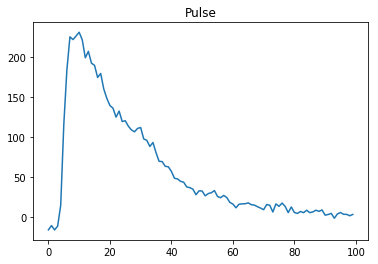

In [6]:
for indx, row in tqdm_notebook(gp_table.iterrows()):
    pulse = np.loadtxt(row['fName'], skiprows=4)
    plt.close()
    plt.title(row['Type'])
    plt.plot(pulse)

    if row['Type'] == 'Pulse':
        plt.savefig('./pulses/' + row['Date'] + '_plot_' + str(indx) + '.png',
                    format='png')
    elif row['Type'] == 'Noise':
        plt.savefig('./trash/' + row['Date'] + '_plot_' + str(indx) + '.png',
                    format='png')
    else:
        print('Alert! Something wrong!!!')